In [8]:
import numpy as np 
import pandas as pd

In [9]:
train_df=pd.read_csv("trein.csv")
test_df=pd.read_csv("test.csv")
sub_df=pd.read_csv("sample_submission.csv")

In [10]:
train_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [11]:
train_df['stroke'].unique()

array([0, 1], dtype=int64)

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [13]:
train_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,7651.500000,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,4418.028595,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,3825.750000,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,7651.500000,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,11477.250000,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,15303.000000,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


In [14]:
train_df.nunique()

id                   15304
gender                   3
age                    106
hypertension             2
heart_disease            2
ever_married             2
work_type                5
Residence_type           2
avg_glucose_level     3740
bmi                    407
smoking_status           4
stroke                   2
dtype: int64

In [15]:
train_df.duplicated().sum()

0

In [16]:
sorted(train_df['age'].unique().tolist())[0:12]

[0.08, 0.16, 0.24, 0.32, 0.4, 0.48, 0.56, 0.64, 0.68, 0.72, 0.8, 0.88]

In [17]:
train_df['age']=np.ceil(train_df['age'])
test_df['age']=np.ceil(test_df['age'])

In [18]:
train_df['gender'].value_counts()




gender
Female    9446
Male      5857
Other        1
Name: count, dtype: int64

In [19]:
train_df.drop(train_df[train_df['gender']=='other'].index,inplace=True)
test_df.drop(test_df[test_df['gender']=='other'].index,inplace=True)

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
sns.set_style("darkgrid")

In [21]:
!pip install plotly


In [22]:
plot_color=['#008080','black']
sns.set_palette(['#008080','black'])

In [23]:
no_stroke_data=train_df[train_df['stroke']==0]
stroke_data=train_df[train_df['stroke']==1]

In [24]:
stroke_count=train_df['stroke'].value_counts()

In [25]:
stroke_count

stroke
0    14672
1      632
Name: count, dtype: int64

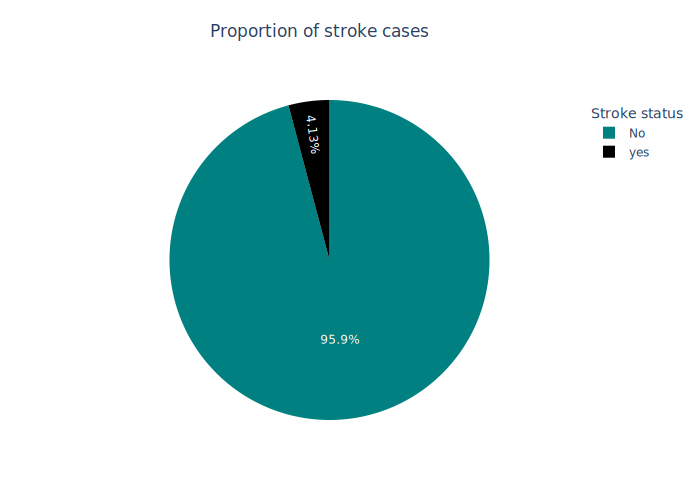

In [26]:
fig = px.pie(
    data_frame=stroke_count,    # Pass stroke_count as a keyword argument
    values=stroke_count.values,  # Values should come after data_frame
    names=['No', 'yes'],         # Fix '==' to '='
    title='Proportion of stroke cases',
    color_discrete_sequence=plot_color
)

fig.update_layout(legend_title_text='Stroke status', title_x=0.3, title_y=0.95)
fig.show('svg')



In [27]:
!pip install -U kaleido


In [29]:
def custom_histogram(columns:str,titles:list)->go.Figure:
    fig=sp.make_subplots(rows=1,cols=2,subplot_titles=['no Stroke','yes stroke'])
    histogram_no_stroke=px.histogram(no_stroke_data,x=columns,color_discrete_sequence=['#008080'])
    histogram_stroke=px.histogram(stroke_data,x=columns,color_discrete_sequence=['#008080'])
    fig.add_trace(histogram_no_stroke['data'][0],row=1,col=1)
    fig.add_trace(histogram_stroke['data'][0],row=1,col=2)
    fig.update_layout(title=titles[0], title_x=0.5)
    fig.update_xaxes(title_text=titles[1])
    fig.update_yaxes(title_text='count')
    return fig
    
    

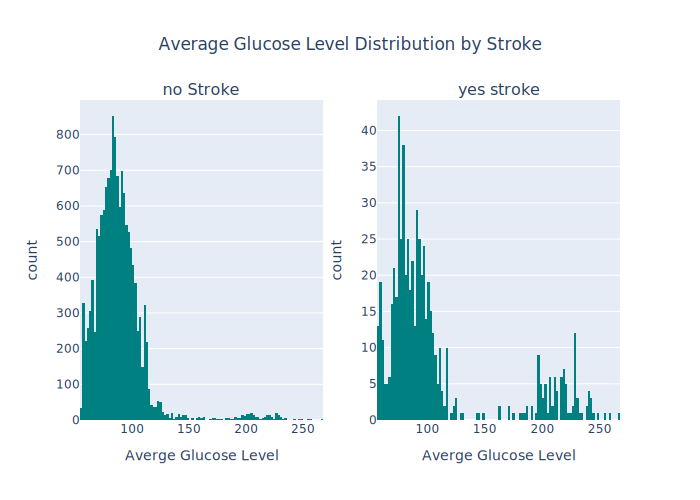

In [30]:
fig=custom_histogram('avg_glucose_level',['Average Glucose Level Distribution by Stroke','Averge Glucose Level'])
fig.show('svg')

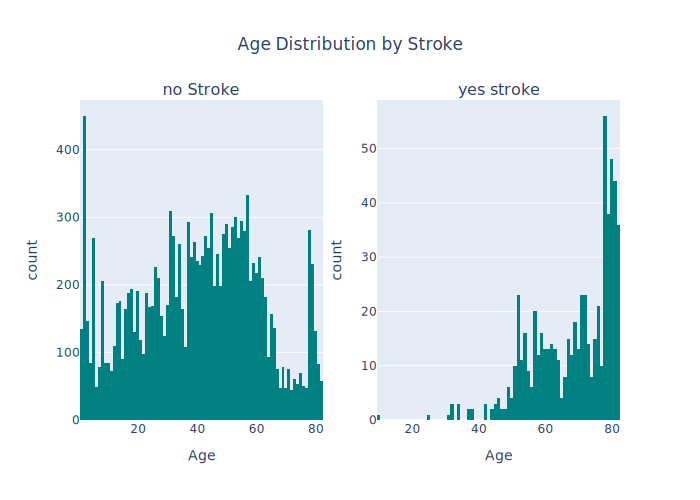

In [31]:
fig=custom_histogram('age',['Age Distribution by Stroke','Age'])
fig.show('svg')

In [32]:
stroke_data['bmi'].mean(0)

30.230696202531643

In [33]:
no_stroke_data['bmi'].mean()

28.02148854961832

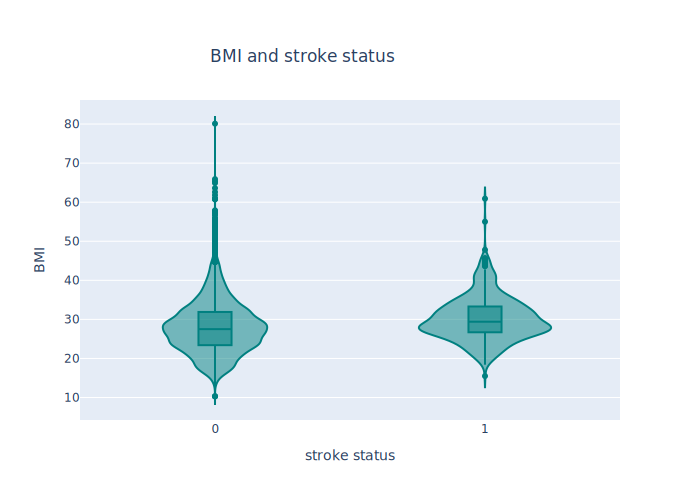

In [34]:
fig=px.violin(train_df,y='bmi',x='stroke',box=True,width=700,height=500,color_discrete_sequence=plot_color,title='BMI and stroke status',
              labels={'stroke':'stroke status','bmi':'BMI'})
fig.update_layout(title_x=0.3,title_y=0.9)
fig.show('svg')

In [35]:
train_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

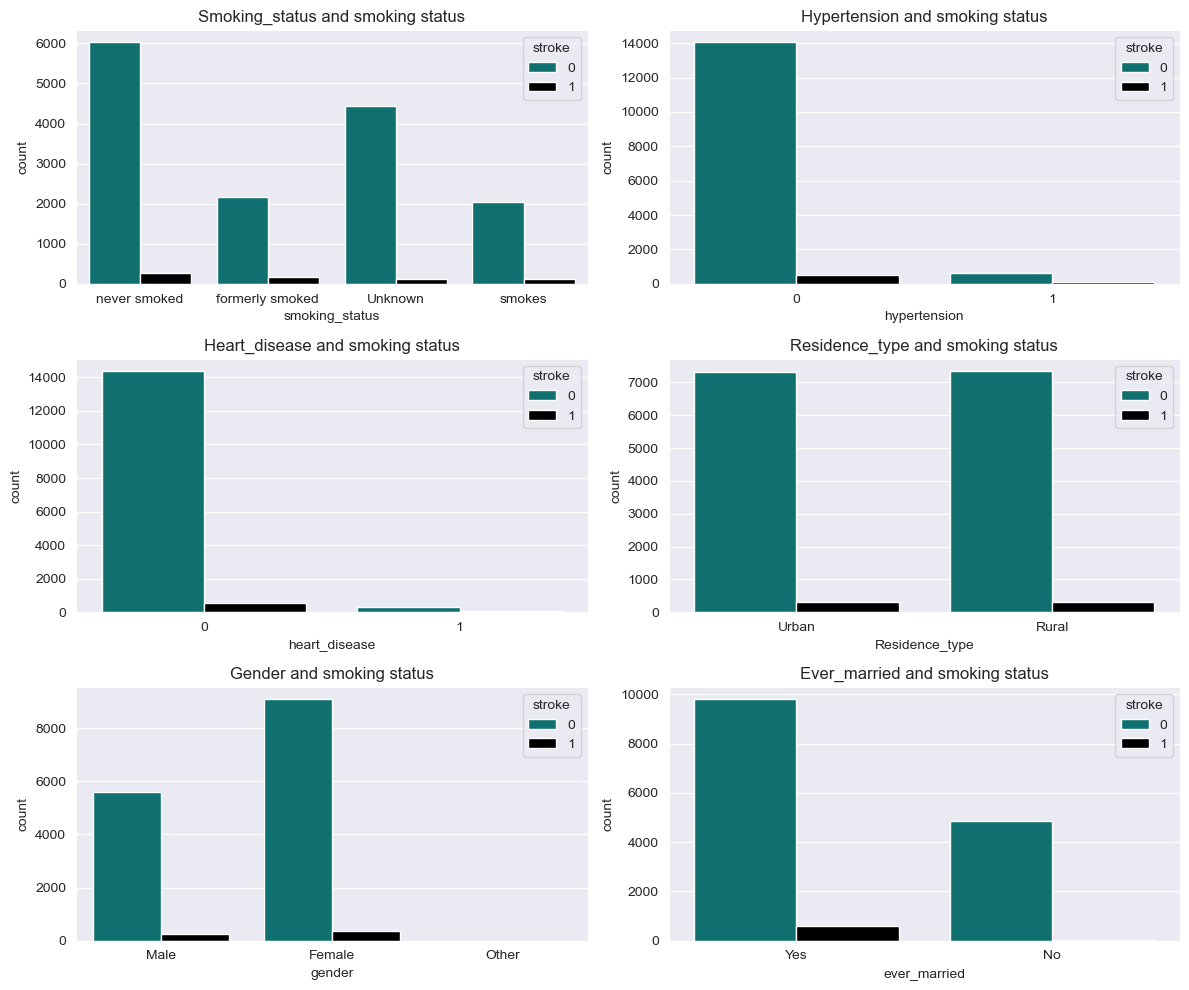

In [36]:
x_values=['smoking_status','hypertension', 'heart_disease','Residence_type','gender', 'ever_married']
fig,axis=plt.subplots(nrows=3,ncols=2,figsize=(12,10))

for ax,x_value in zip(axis.flat,x_values):
    sns.countplot(data=train_df,x=x_value,hue='stroke',ax=ax)
    ax.set_title(f'{x_value.capitalize()} and smoking status')


plt.tight_layout()
plt.show()

In [37]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config

set_config(display='diagram')

In [38]:
train_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [39]:
input_cols=list(train_df.columns)[1:-1]

In [40]:
target_col='stroke'

In [41]:
input_cols

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [42]:
train_inputs=train_df[input_cols].copy()
train_target=train_df[target_col].copy()

test_inputs=test_df[input_cols].copy()

In [43]:
numerical_cols=train_inputs.select_dtypes(include=np.number).columns.to_list()

In [44]:
numerical_cols

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

In [45]:
categorical_cols=train_inputs.select_dtypes(include='object').columns.to_list()

In [46]:
categorical_cols

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [47]:
categorical_cols.remove('smoking_status')

In [48]:
train_df['smoking_status'].unique()

array(['never smoked', 'formerly smoked', 'Unknown', 'smokes'],
      dtype=object)

In [49]:
ordinal_enc=OrdinalEncoder(categories=[['Unknown','never smoked', 'formerly smoked','smokes']])

In [50]:
onehot_enc=OneHotEncoder(handle_unknown='ignore')

In [51]:
preprocessor=ColumnTransformer([
    ('Ordinal_Encode',ordinal_enc,['smoking_status']),
    ('OneHot_Encode',onehot_enc,categorical_cols)
])

In [52]:
preprocessor.fit(train_inputs)

ColumnTransformer(transformers=[('Ordinal_Encode',
                                 OrdinalEncoder(categories=[['Unknown',
                                                             'never smoked',
                                                             'formerly smoked',
                                                             'smokes']]),
                                 ['smoking_status']),
                                ('OneHot_Encode',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['gender', 'ever_married', 'work_type',
                                  'Residence_type'])])

In [53]:
encoded_cols=list(preprocessor.get_feature_names_out())

In [54]:
encoded_cols

['Ordinal_Encode__smoking_status',
 'OneHot_Encode__gender_Female',
 'OneHot_Encode__gender_Male',
 'OneHot_Encode__gender_Other',
 'OneHot_Encode__ever_married_No',
 'OneHot_Encode__ever_married_Yes',
 'OneHot_Encode__work_type_Govt_job',
 'OneHot_Encode__work_type_Never_worked',
 'OneHot_Encode__work_type_Private',
 'OneHot_Encode__work_type_Self-employed',
 'OneHot_Encode__work_type_children',
 'OneHot_Encode__Residence_type_Rural',
 'OneHot_Encode__Residence_type_Urban']

In [55]:
train_inputs[encoded_cols]=preprocessor.transform(train_inputs)
test_inputs[encoded_cols]=preprocessor.transform(test_inputs)

In [56]:
x_train=train_inputs[numerical_cols + encoded_cols]
y_train=train_df[target_col]

x_test=test_inputs[numerical_cols+encoded_cols]

In [57]:
x_train.shape[1]==x_test.shape[1]

True

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [60]:
x_train.shape

(12243, 18)

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [62]:
!pip install imbalanced-learn


In [63]:
!pip install xgboost


  Using cached xgboost-2.1.3-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.3-py3-none-win_amd64.whl (124.9 MB)


In [1]:

!pip install lightgbm


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

from imblearn.over_sampling import SMOTE

In [68]:
import sys
print(sys.executable)


c:\Users\Admin\anaconda3\python.exe


In [69]:
C:/Users\Admin\anaconda3\python.exe

SyntaxError: invalid syntax (3373420701.py, line 1)

In [70]:
import lightgbm as lgb
print(lgb.__version__)


4.5.0


In [71]:
models=[
    (LogisticRegression(), 'LogisticRegression'),
    (RandomForestClassifier(), 'RandomForestClassifier'),
    (XGBClassifier(), 'XGBClassifier'),
    (LGBMClassifier(verbose=1), 'LightGBM')
]

In [72]:
def evalue_model(model,x_train,y_train,x_value,y_value):
    y_pred=model.predict(x_val)
    confusion_mat=confusion_matrix(y_val,y_pred)
    accuracy=accuracy_score(y_val,y_pred)
    precision=precision_score(y_val,y_pred)
    recall=recall_score(y_val,y_pred)
    f1=f1_score(y_val,y_pred)
    return confusion_mat,accuracy,precision,recall,f1

In [73]:
confusion_mats={}
def metric_df(model,model_name):
    confusion_mat, *df=evalue_model(model,x_train,y_train,x_val,y_val)
    confusion_mats[model_name]=confusion_mat
    df=[df]
    model_metrics=pd.DataFrame(data=df,columns=['accuracy','precision','recall','f1'])
    model_metrics.insert(0,'model',model_name)

    return model_metrics

In [74]:
predictions=[]
for model,model_name in models:
    model.fit(x_train,y_train)
    model_metrics=metric_df(model,model_name)
    predictions.append(model_metrics)

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[LightGBM] [Info] Number of positive: 502, number of negative: 11741
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000632 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 12243, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.041003 -> initscore=-3.152242
[LightGBM] [Info] Start training from score -3.152242


In [75]:
predictions

[                model  accuracy  precision    recall        f1
 0  LogisticRegression  0.957857   0.545455  0.046154  0.085106,
                     model  accuracy  precision    recall        f1
 0  RandomForestClassifier   0.95557       0.35  0.053846  0.093333,
            model  accuracy  precision    recall        f1
 0  XGBClassifier  0.954263   0.368421  0.107692  0.166667,
       model  accuracy  precision    recall        f1
 0  LightGBM  0.954917   0.318182  0.053846  0.092105]

In [76]:
oversample=SMOTE()
x_train_ns,y_train_ns=oversample.fit_resample(x_train,y_train)


In [77]:
x_train_ns.shape

(23482, 18)

In [78]:
lr_with_smote=LogisticRegression()
lr_with_smote.fit(x_train_ns,y_train_ns)
lr_with_smote_mat=metric_df(lr_with_smote,'Logistic With SMOTE')
predictions.append(lr_with_smote_mat)

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [79]:
for model_name,confusion_mat in confusion_mats.items():
    print(f'confusion matrix for {model_name}')
    print(confusion_mat)
    print()

confusion matrix for LogisticRegression
[[2926    5]
 [ 124    6]]

confusion matrix for RandomForestClassifier
[[2918   13]
 [ 123    7]]

confusion matrix for XGBClassifier
[[2907   24]
 [ 116   14]]

confusion matrix for LightGBM
[[2916   15]
 [ 123    7]]

confusion matrix for Logistic With SMOTE
[[2313  618]
 [  29  101]]



In [80]:
from sklearn.ensemble import VotingClassifier

In [81]:
estimator=[]
estimator.append(('LogisticRegression',LogisticRegression())),
estimator.append(('RandomForestClassifier',RandomForestClassifier())),
estimator.append(( 'XGBClassifier',XGBClassifier())),
estimator.append(('LightGBM',LGBMClassifier(verbose=1)))

In [82]:
vc_hard= VotingClassifier(estimators=estimator,voting='hard')
vc_hard.fit(x_train,y_train)
vc_hard_mat=metric_df(vc_hard,'VC_HARD')
predictions.append(vc_hard_mat)

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[LightGBM] [Info] Number of positive: 502, number of negative: 11741
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 12243, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.041003 -> initscore=-3.152242
[LightGBM] [Info] Start training from score -3.152242


In [83]:
vc_hard_mat

,model,accuracy,precision,recall,f1
0,VC_HARD,0.956877,0.375,0.023077,0.043478


In [84]:
vc_soft= VotingClassifier(estimators=estimator,voting='soft')
vc_soft.fit(x_train,y_train)
vc_soft_mat=metric_df(vc_soft,'VC_soft')
predictions.append(vc_soft_mat)

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[LightGBM] [Info] Number of positive: 502, number of negative: 11741
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003263 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 12243, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.041003 -> initscore=-3.152242
[LightGBM] [Info] Start training from score -3.152242


In [85]:
vc_soft_mat

,model,accuracy,precision,recall,f1
0,VC_soft,0.956223,0.375,0.046154,0.082192


In [86]:
prediction_base=pd.concat(predictions,ignore_index=True,sort=False)
prediction_base=prediction_base.sort_values(by=['recall'],ascending=False).style.hide(axis='index')

In [87]:
prediction_base

model,accuracy,precision,recall,f1
Logistic With SMOTE,0.788631,0.140473,0.776923,0.237927
XGBClassifier,0.954263,0.368421,0.107692,0.166667
RandomForestClassifier,0.955570,0.350000,0.053846,0.093333
LightGBM,0.954917,0.318182,0.053846,0.092105
LogisticRegression,0.957857,0.545455,0.046154,0.085106
VC_soft,0.956223,0.375000,0.046154,0.082192
VC_HARD,0.956877,0.375000,0.023077,0.043478


In [88]:
models_to_plot=[
    'LogisticRegression',
    'RandomForestClassifier',
    'XGBClassifier',
    'Logistic With SMOTE'
]

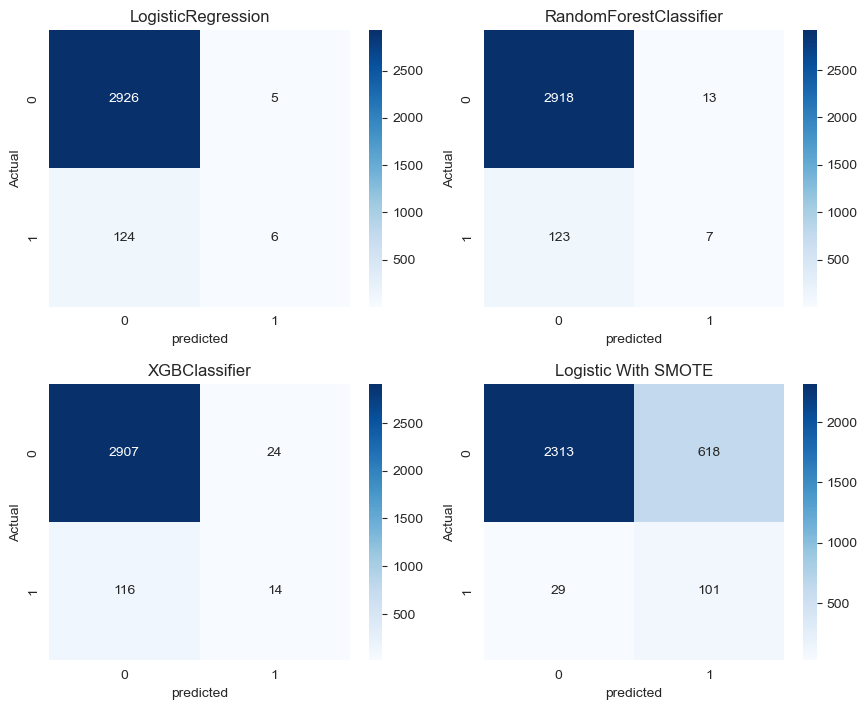

In [89]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(9,7))
for  ax,model_name in zip(axes.ravel(),models_to_plot):
    confusion_mat=confusion_mats[model_name]
    sns.heatmap(confusion_mat,annot=True,fmt='d',cmap='Blues',ax=ax)
    ax.set_title(f'{model_name}')
    ax.set_xlabel('predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.subplots_adjust(left=0,right=0.9,top=0.9,bottom=0)
plt.show()

In [90]:
x_train=train_inputs[numerical_cols + encoded_cols]
y_train=train_df[target_col]

In [91]:
preds=lr_with_smote.predict(x_test)

In [92]:
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [93]:
sub_df=preds

In [94]:
pd.DataFrame(sub_df).to_csv("submission.csv",index=None)

In [95]:
sub_df=pd.read_csv("submission.csv")

In [96]:
sub_df.head()

,0
0,0
1,0
2,0
3,1
4,0


In [97]:
sub_df['stroke']=preds

In [98]:
sub_df

,0,stroke
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
10199,0,0
10200,0,0
10201,0,0
10202,0,0


In [99]:
train_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [100]:
single_input={
    'gender': 'Male',
    'age':33,
    'hypertension':0,
    'heart_disease':0,
    'ever_married':'Yes',
    'work_type':'Private',
    'Residence_type':'Urban',
    'avg_glucose_level':79.53,
    'bmi':31.10,
    'smoking_status':'formerly smoked'
}

In [101]:
input_df=pd.DataFrame([single_input])

In [102]:
input_df[encoded_cols]=preprocessor.transform(input_df)

In [103]:
x=input_df[numerical_cols + encoded_cols]

In [104]:
lr_with_smote.predict(x)

array([0], dtype=int64)

In [105]:
model={
    'encoded_cols':encoded_cols,
    'numeric_cols':numerical_cols,
    'preprocessor':preprocessor,
    'model':lr_with_smote
}

In [106]:
import joblib

In [107]:
joblib.dump(model,'model.joblib')

['model.joblib']